In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [14]:
df = pd.read_csv('spam_mail.csv')
df.head()

,mails,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [17]:
le = LabelEncoder()
df['text_enc'] = le.fit_transform(df['text'])
df['label_enc'] = le.fit_transform(df['label'])

X = df[['text_enc','label_enc']]
y = df['label_num']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
model = DecisionTreeClassifier(criterion = 'gini',random_state = 42,max_depth = 3)

model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))


Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1 Score :  1.0
Confusion Matrix : 
 [[1121    0]
 [   0  431]]


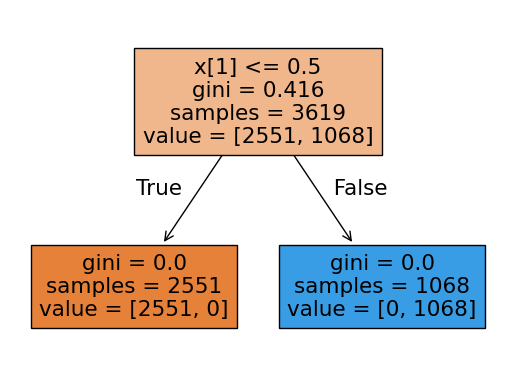

In [20]:
plot_tree(model,filled = True)
plt.show()

In [42]:
X = df[['text_enc']]
y = df['label_num']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pre = lr.predict(X_test)

In [36]:
print("Accuracy : ",accuracy_score(y_test,y_pre))
print("Precision : ",precision_score(y_test,y_pre))
print("Recall : ",recall_score(y_test,y_pre))
print("F1 Score : ",f1_score(y_test,y_pre))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pre))

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1 Score :  1.0
Confusion Matrix : 
 [[1121    0]
 [   0  431]]


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- label_enc


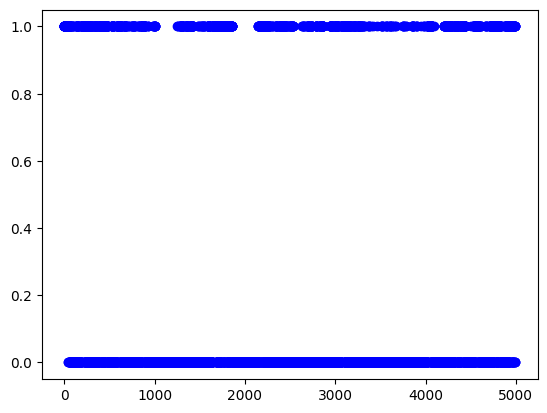

In [43]:
plt.scatter(X,y, color='blue', label='Actual')
plt.plot(X, model.predict(X), color='red', label='Predicted')
plt.title("Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()